# Day 1 - Data Exploration

### Questions to answer

- understand the shape of data
- understand objects: understand how many individuals are part of the study? 
- undetsand what the columns are telling us 
- get understanding of quality of data
- do we need a unique ID per person? 

### Import Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path = '/Users/bernadettebrandner/code/bernadetti0/predicting_activity/raw_data/aw_fb_data.csv'

In [3]:
data = pd.read_csv(path)
data.tail()

Unnamed: 0    X1  age  gender  height  weight  steps  hear_rate  \
6259        6260  3666   46       0   157.5    71.4    1.0       35.0   
6260        6261  3667   46       0   157.5    71.4    1.0       35.0   
6261        6262  3668   46       0   157.5    71.4    1.0       35.0   
6262        6263  3669   46       0   157.5    71.4    1.0       35.0   
6263        6264  3670   46       0   157.5    71.4    1.0       35.0   

      calories  distance  entropy_heart  entropy_setps  resting_heart  \
6259      20.5       1.0            0.0            0.0           35.0   
6260      20.5       1.0            0.0            0.0           35.0   
6261      20.5       1.0            0.0            0.0           35.0   
6262      20.5       1.0            0.0            0.0           35.0   
6263      20.5       1.0            0.0            0.0           35.0   

      corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
6259               1.0         0.0                 0.0            0.0   
6260               1.0         0.0                 0.0            1.0   
6261               1.0         0.0                 0.0            1.0   
6262               1.0         0.0                 0.0            1.0   
6263               1.0         0.0                 0.0            1.0   

      steps_times_distance  device        activity  
6259                   1.0  fitbit  Running 7 METs  
6260                   1.0  fitbit  Running 7 METs  
6261                   1.0  fitbit  Running 7 METs  
6262                   1.0  fitbit  Running 7 METs  
6263                   1.0  fitbit  Running 7 METs

<Axes: xlabel='sd_norm_heart', ylabel='Count'>

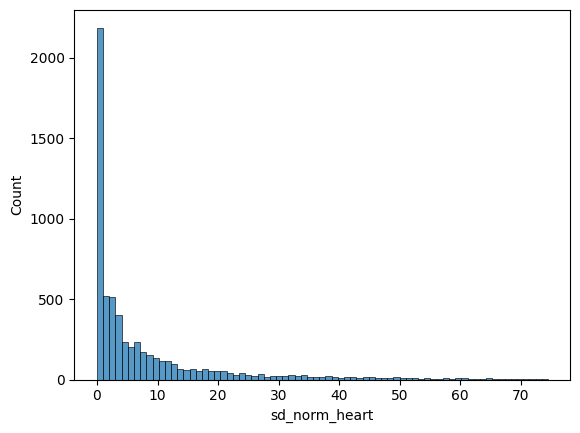

In [4]:
var = data.sd_norm_heart
sns.histplot(var)

- corr_heart is a correlation
- intensity carvonen looks suspicious --> it has the value 0 even though the person is running

<Axes: xlabel='norm_heart', ylabel='Count'>

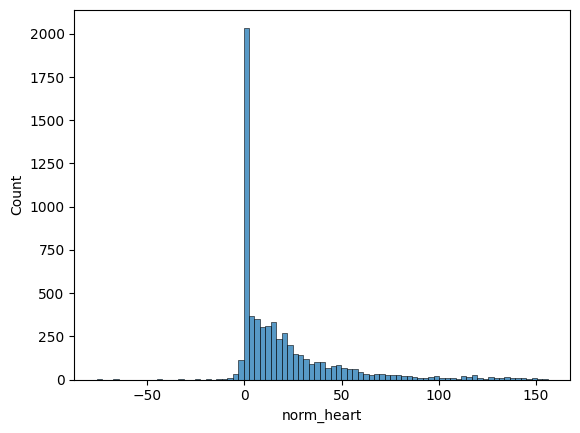

In [5]:
sns.histplot(data.norm_heart)

<Axes: xlabel='norm_heart', ylabel='hear_rate'>

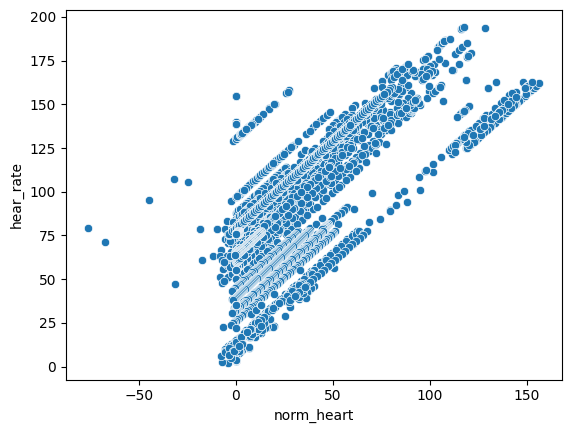

In [6]:
tempor = data[data['norm_heart'] == 0]
sns.scatterplot(x =data['norm_heart'], y=data['hear_rate'])

## Split Datset into Apple and FB data

In [7]:
data_apple = data[data['device'] == 'apple watch']
data_fitbit = data[data['device'] == 'fitbit']

### Shape of data

In [8]:
data.shape

(6264, 20)

In [9]:
data.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [10]:
data.dtypes

Unnamed: 0                int64
X1                        int64
age                       int64
gender                    int64
height                  float64
weight                  float64
steps                   float64
hear_rate               float64
calories                float64
distance                float64
entropy_heart           float64
entropy_setps           float64
resting_heart           float64
corr_heart_steps        float64
norm_heart              float64
intensity_karvonen      float64
sd_norm_heart           float64
steps_times_distance    float64
device                   object
activity                 object
dtype: object

In [11]:
data_apple.steps.value_counts()

steps
10.771429     42
4.000000      21
8.000000      19
126.000000    19
119.000000    16
              ..
7.125000       1
6.687500       1
5.812500       1
4.937500       1
759.500000     1
Name: count, Length: 2691, dtype: int64

In [12]:
data['Unnamed: 0'].nunique()

6264

(array([1050., 1749.,  783., 1255.,  559.,  309.,    0.,  169.,   94.,
         296.]),
 array([18. , 21.8, 25.6, 29.4, 33.2, 37. , 40.8, 44.6, 48.4, 52.2, 56. ]),
 <BarContainer object of 10 artists>)

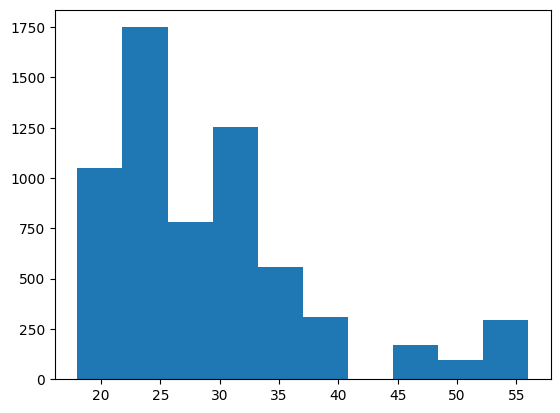

In [13]:
plt.hist(data.age)

(array([1379.,    0.,  930.,    0.,  889.,    0.,  950.,    0., 1002.,
        1114.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

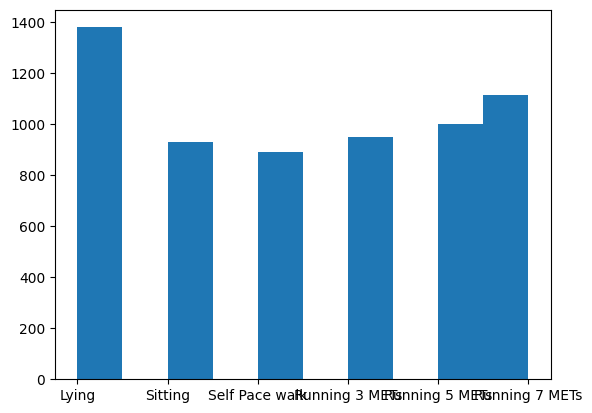

In [14]:
plt.hist(data.activity)

In [15]:
data.device.value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

In [16]:
data_apple.activity.value_counts()

activity
Lying             787
Running 7 METs    613
Running 5 METs    603
Running 3 METs    572
Sitting           552
Self Pace walk    529
Name: count, dtype: int64

In [17]:
data_fitbit.activity.value_counts()

activity
Lying             592
Running 7 METs    501
Running 5 METs    399
Running 3 METs    378
Sitting           378
Self Pace walk    360
Name: count, dtype: int64

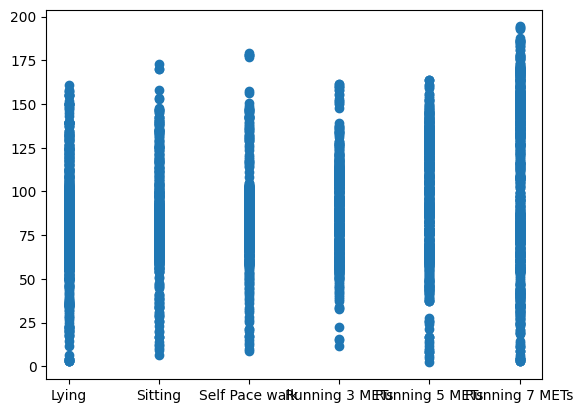

In [18]:
plt.scatter(data.activity, data.hear_rate)

Info from study description 
- we should have 46 individuals (according to study description) 
- one row is one minute according to study description
- Participants completed a 65-minute protocol
- drop Unnamed and X1 column
  


### Data Cleaning

In [19]:
duplicates = data[data.duplicated() == True]
duplicates

Empty DataFrame
Columns: [Unnamed: 0, X1, age, gender, height, weight, steps, hear_rate, calories, distance, entropy_heart, entropy_setps, resting_heart, corr_heart_steps, norm_heart, intensity_karvonen, sd_norm_heart, steps_times_distance, device, activity]
Index: []

In [20]:
data.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [21]:
data.isnull().sum().any()

False

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

- no duplicate rows
- no null values
- typos in the column name e.g. 'hear_rate / sept'

In [23]:
corr = data_apple.select_dtypes(include = 'number')

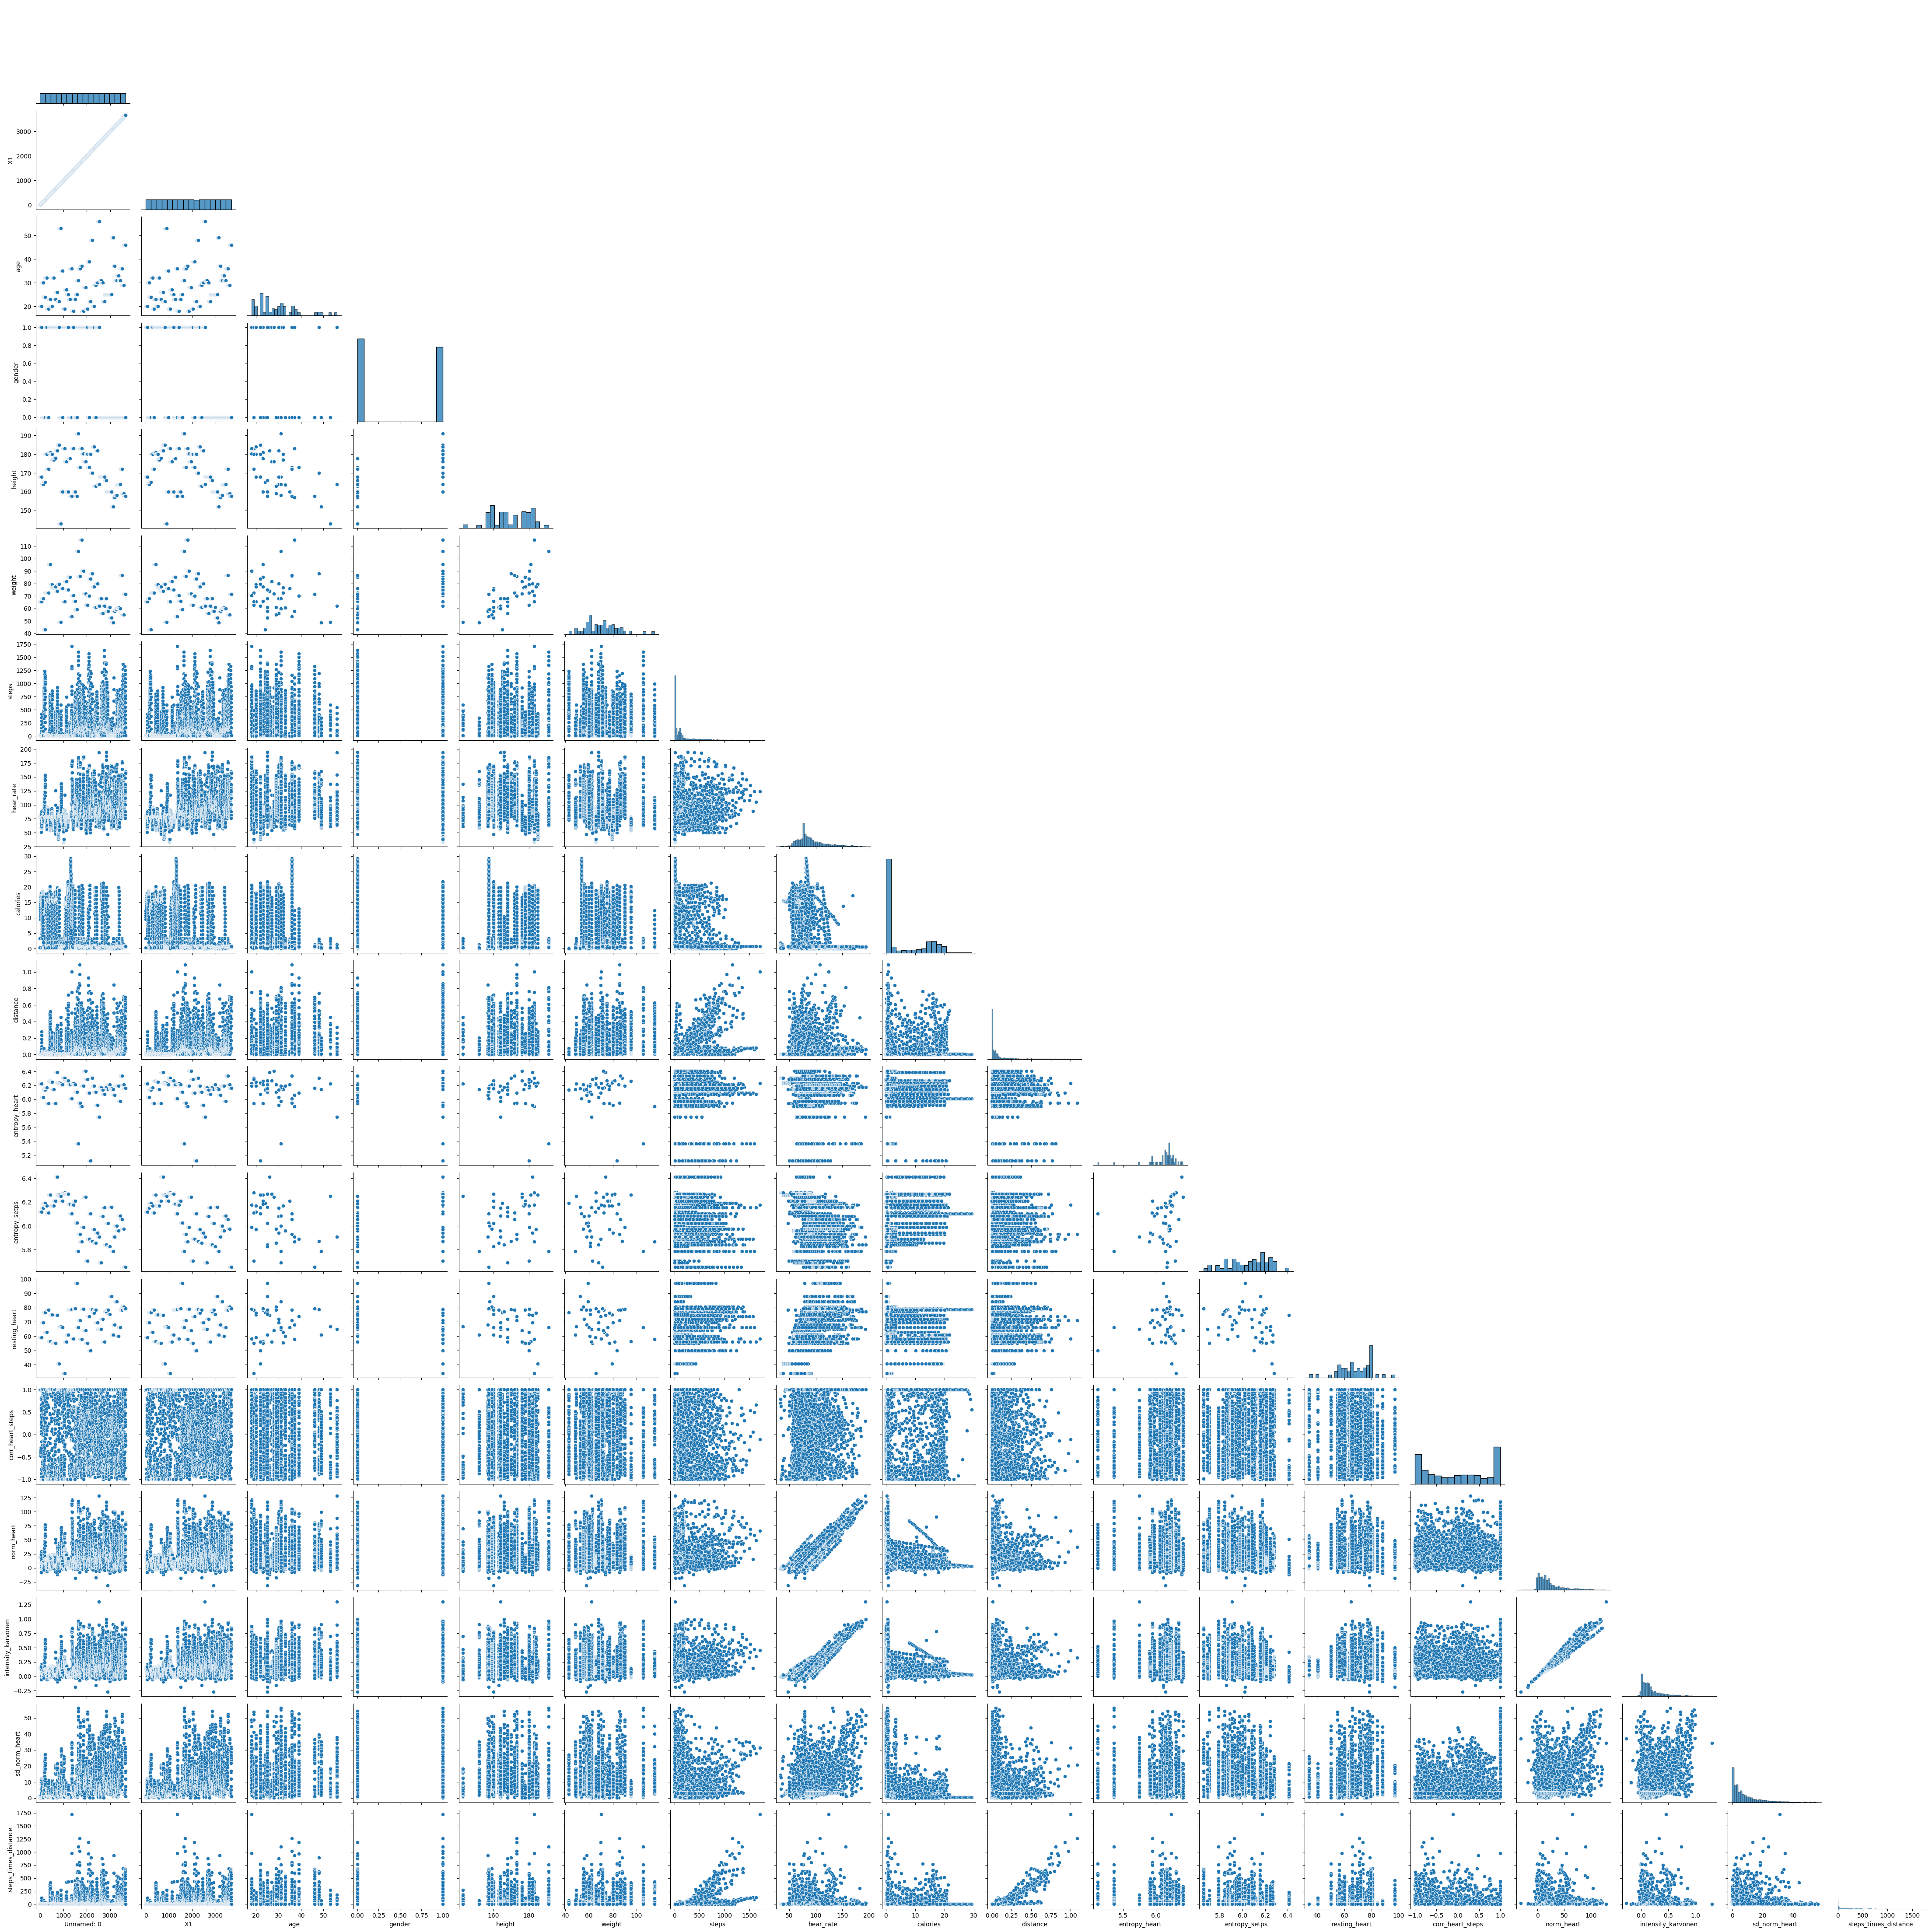

In [24]:
sns.pairplot(corr, corner = True)

<Axes: >

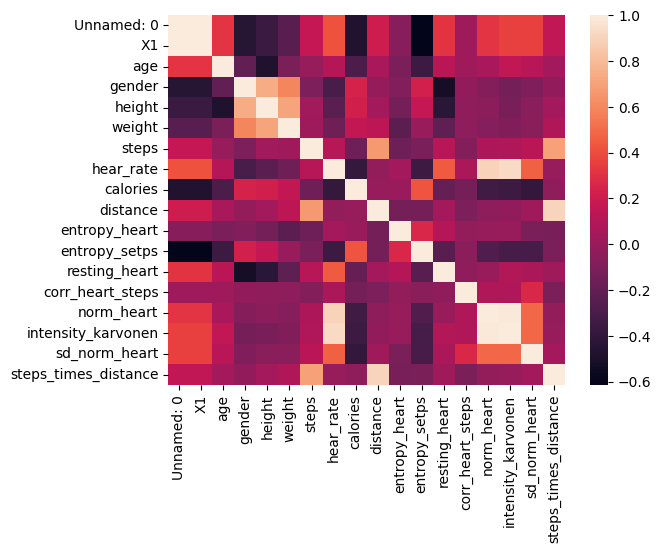

In [25]:
sns.heatmap(corr.corr())

# Day 2 - Feature Engineering

### Create a unique identifyer for each participant

In [26]:
data.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [30]:
data.insert(loc=0, column='participant_id', value = data.set_index(['age', 'gender', 'height', 'weight']).index.factorize()[0]+1)

In [31]:
temp = pd.DataFrame(data.participant_id.value_counts())
temp.sort_values(by=['participant_id'])

count
participant_id       
1                 140
2                 142
3                 146
4                 144
5                 138
6                 156
7                 152
8                 144
9                 148
10                170
11                156
12                152
13                148
14                158
15                154
16                154
17                105
18                144
19                137
20                 83
21                 82
22                 77
23                105
24                 81
25                 82
26                178
27                156
28                 84
29                 94
30                 88
31                 87
32                146
33                 80
34                144
35                 81
36                146
37                133
38                109
39                144
40                 83
41                156
42                 94
43                144
44                135
45                152
46                154
47                162
48                135
49                 81

In [41]:
data.groupby('participant_id').count()

Unnamed: 0   X1  age  gender  height  weight  steps  \
participant_id                                                        
1                      140  140  140     140     140     140    140   
2                      142  142  142     142     142     142    142   
3                      146  146  146     146     146     146    146   
4                      144  144  144     144     144     144    144   
5                      138  138  138     138     138     138    138   
6                      156  156  156     156     156     156    156   
7                      152  152  152     152     152     152    152   
8                      144  144  144     144     144     144    144   
9                      148  148  148     148     148     148    148   
10                     170  170  170     170     170     170    170   
11                     156  156  156     156     156     156    156   
12                     152  152  152     152     152     152    152   
13                     148  148  148     148     148     148    148   
14                     158  158  158     158     158     158    158   
15                     154  154  154     154     154     154    154   
16                     154  154  154     154     154     154    154   
17                     105  105  105     105     105     105    105   
18                     144  144  144     144     144     144    144   
19                     137  137  137     137     137     137    137   
20                      83   83   83      83      83      83     83   
21                      82   82   82      82      82      82     82   
22                      77   77   77      77      77      77     77   
23                     105  105  105     105     105     105    105   
24                      81   81   81      81      81      81     81   
25                      82   82   82      82      82      82     82   
26                     178  178  178     178     178     178    178   
27                     156  156  156     156     156     156    156   
28                      84   84   84      84      84      84     84   
29                      94   94   94      94      94      94     94   
30                      88   88   88      88      88      88     88   
31                      87   87   87      87      87      87     87   
32                     146  146  146     146     146     146    146   
33                      80   80   80      80      80      80     80   
34                     144  144  144     144     144     144    144   
35                      81   81   81      81      81      81     81   
36                     146  146  146     146     146     146    146   
37                     133  133  133     133     133     133    133   
38                     109  109  109     109     109     109    109   
39                     144  144  144     144     144     144    144   
40                      83   83   83      83      83      83     83   
41                     156  156  156     156     156     156    156   
42                      94   94   94      94      94      94     94   
43                     144  144  144     144     144     144    144   
44                     135  135  135     135     135     135    135   
45                     152  152  152     152     152     152    152   
46                     154  154  154     154     154     154    154   
47                     162  162  162     162     162     162    162   
48                     135  135  135     135     135     135    135   
49                      81   81   81      81      81      81     81   

                hear_rate  calories  distance  entropy_heart  entropy_setps  \
participant_id                                                                
1                     140       140       140            140            140   
2                     142       142       142            142            142   
3                     146       146       146            146            146   

### Create a BMI column

In [48]:
data['bmi'] = round(data.weight / (data.height/100)**2)
data.head()

participant_id  Unnamed: 0  X1  age  gender  height  weight      steps  \
0               1           1   1   20       1   168.0    65.4  10.771429   
1               1           2   2   20       1   168.0    65.4  11.475325   
2               1           3   3   20       1   168.0    65.4  12.179221   
3               1           4   4   20       1   168.0    65.4  12.883117   
4               1           5   5   20       1   168.0    65.4  13.587013   

   hear_rate   calories  ...  entropy_setps  resting_heart  corr_heart_steps  \
0  78.531302   0.344533  ...       6.116349           59.0          1.000000   
1  78.453390   3.287625  ...       6.116349           59.0          1.000000   
2  78.540825   9.484000  ...       6.116349           59.0          1.000000   
3  78.628260  10.154556  ...       6.116349           59.0          1.000000   
4  78.715695  10.825111  ...       6.116349           59.0          0.982816   

   norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  \
0   19.531302            0.138520       1.000000              0.089692   
1   19.453390            0.137967       1.000000              0.102088   
2   19.540825            0.138587       1.000000              0.115287   
3   19.628260            0.139208       1.000000              0.129286   
4   19.715695            0.139828       0.241567              0.144088   

        device  activity   bmi  
0  apple watch     Lying  23.0  
1  apple watch     Lying  23.0  
2  apple watch     Lying  23.0  
3  apple watch     Lying  23.0  
4  apple watch     Lying  23.0  

[5 rows x 22 columns]

# Pairplot with core features

In [49]:
data.columns

Index(['participant_id', 'Unnamed: 0', 'X1', 'age', 'gender', 'height',
       'weight', 'steps', 'hear_rate', 'calories', 'distance', 'entropy_heart',
       'entropy_setps', 'resting_heart', 'corr_heart_steps', 'norm_heart',
       'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance', 'device',
       'activity', 'bmi'],
      dtype='object')

In [58]:
data_core_features = data[['age', 'gender', 'height','weight', 'steps', 'hear_rate', 'calories', 'distance', 'bmi']]

data_core_features

age  gender  height  weight      steps  hear_rate   calories  distance  \
0      20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
1      20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
2      20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
3      20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
4      20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   
...   ...     ...     ...     ...        ...        ...        ...       ...   
6259   46       0   157.5    71.4   1.000000  35.000000  20.500000  1.000000   
6260   46       0   157.5    71.4   1.000000  35.000000  20.500000  1.000000   
6261   46       0   157.5    71.4   1.000000  35.000000  20.500000  1.000000   
6262   46       0   157.5    71.4   1.000000  35.000000  20.500000  1.000000   
6263   46       0   157.5    71.4   1.000000  35.000000  20.500000  1.000000   

       bmi  
0     23.0  
1     23.0  
2     23.0  
3     23.0  
4     23.0  
...    ...  
6259  29.0  
6260  29.0  
6261  29.0  
6262  29.0  
6263  29.0  

[6264 rows x 9 columns]

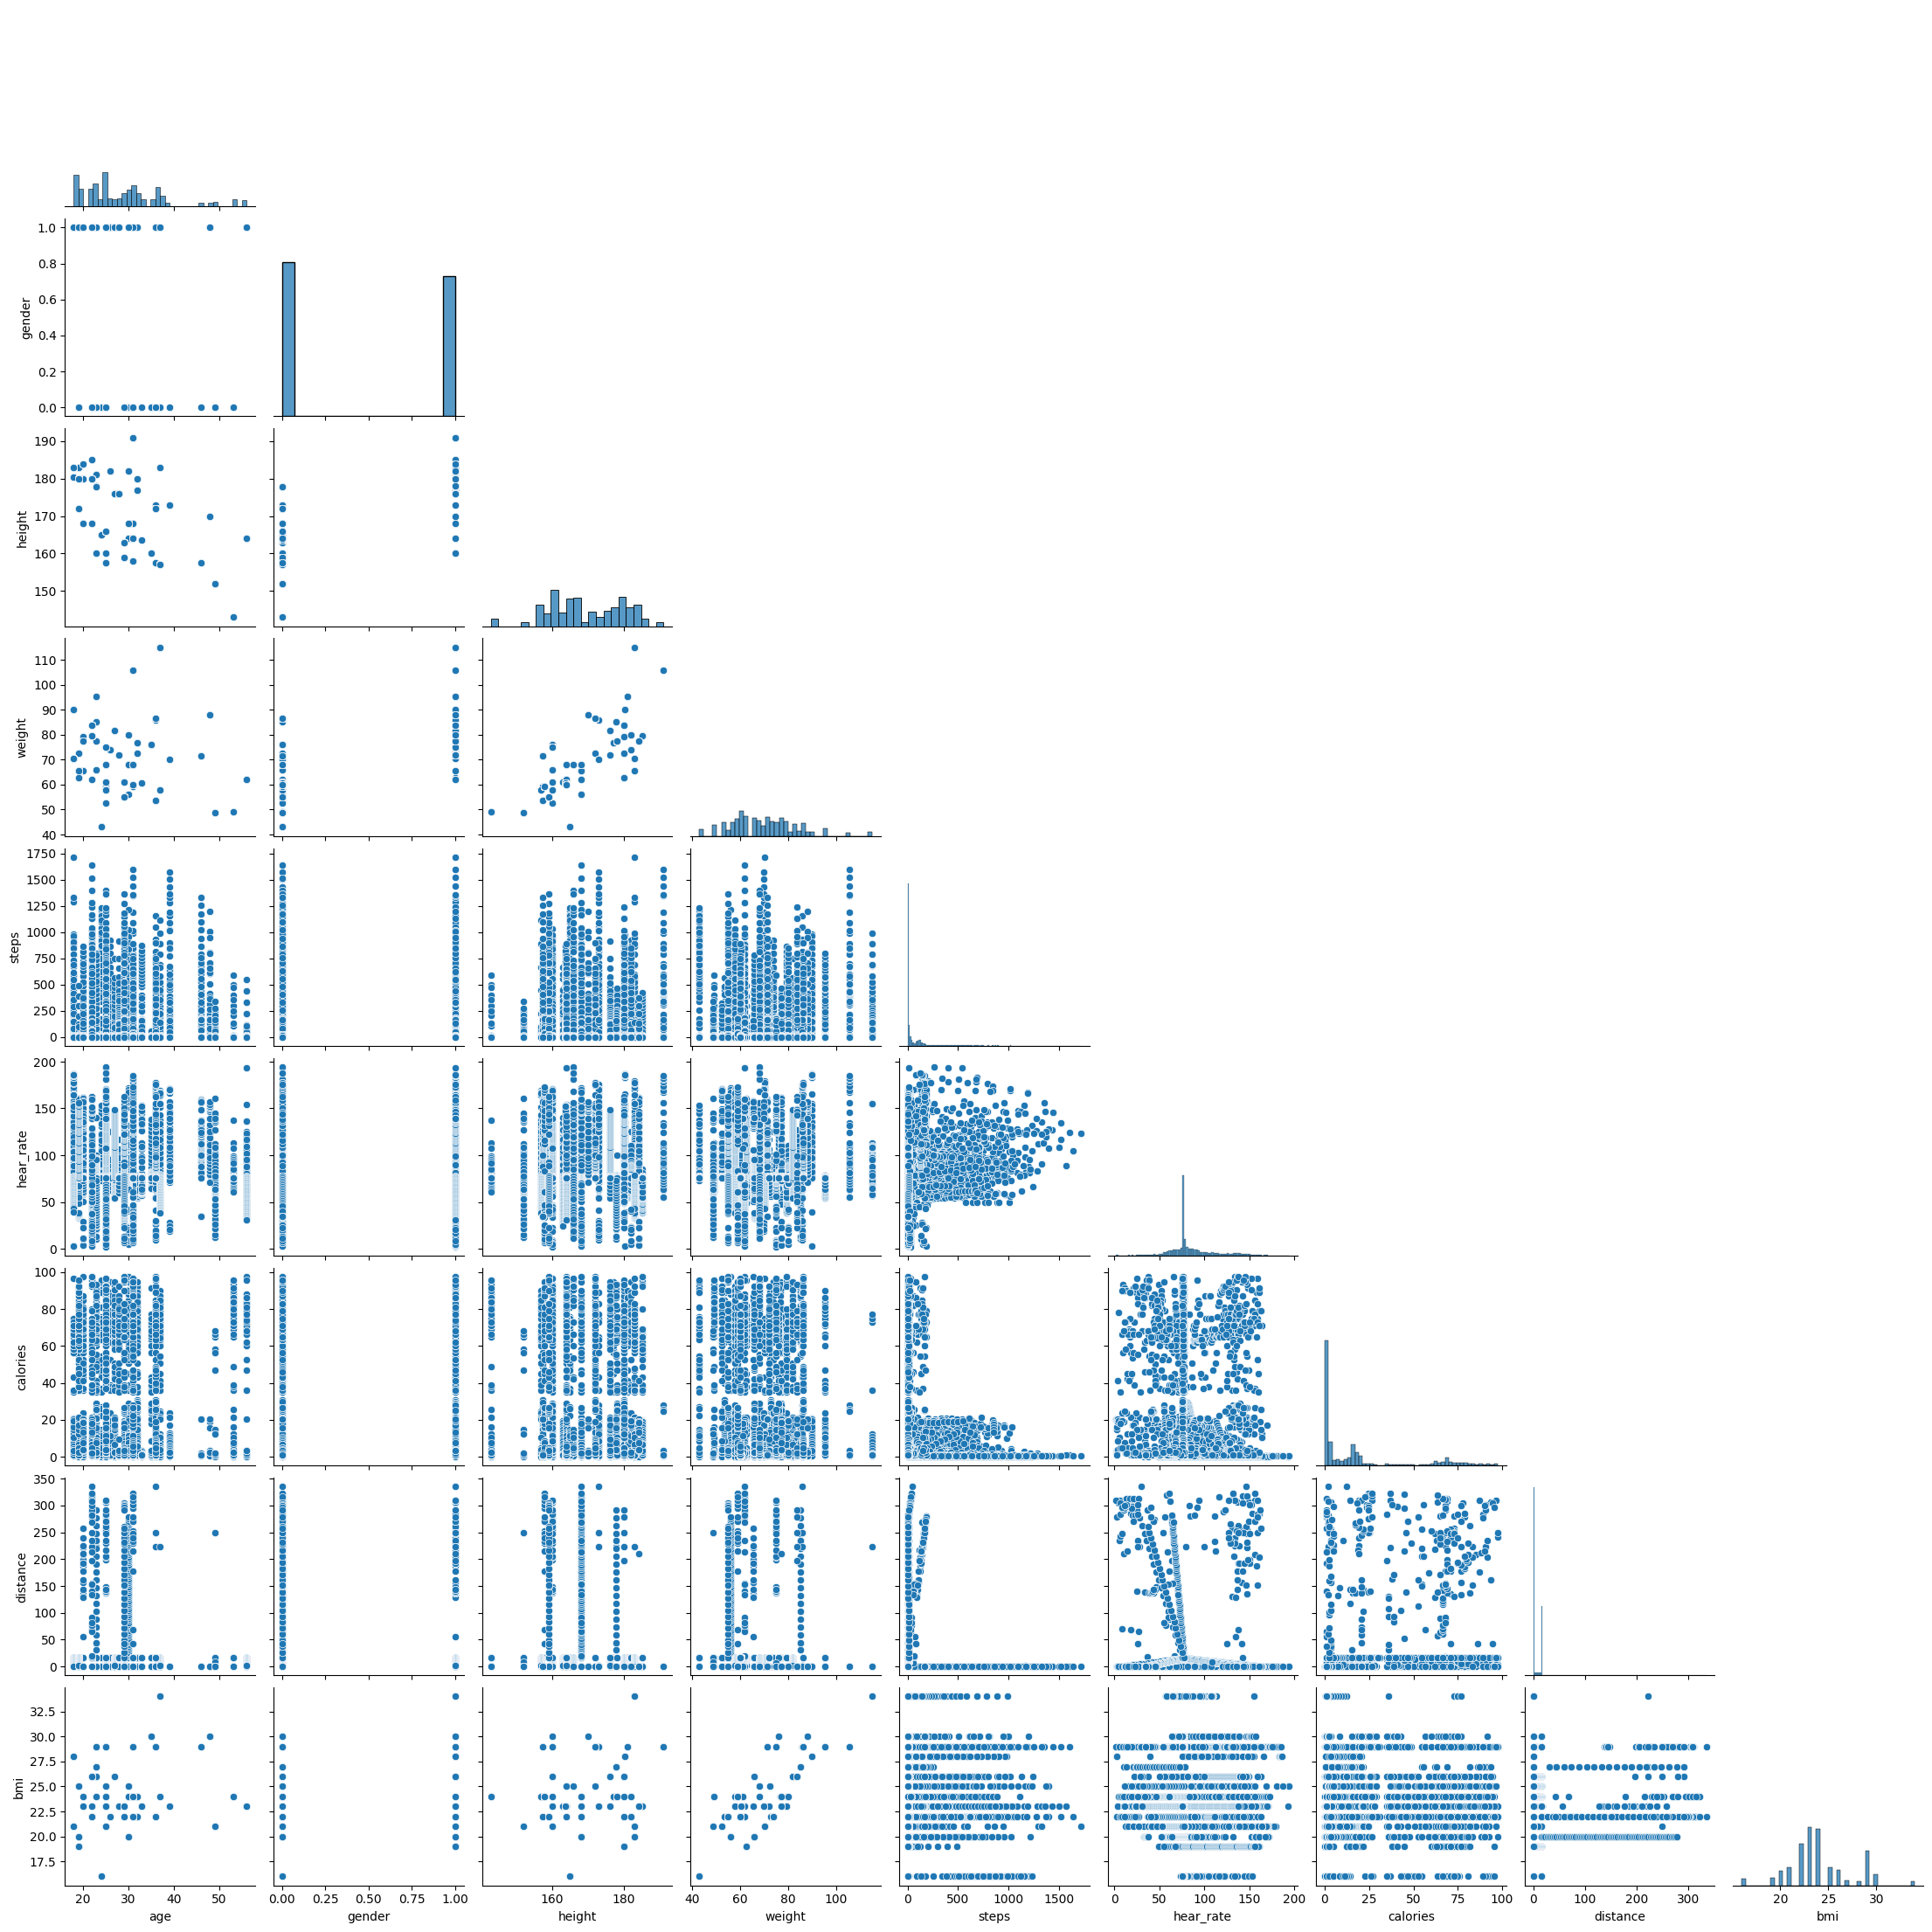

In [59]:
sns.pairplot(data_core_features, corner = True)

<Axes: >

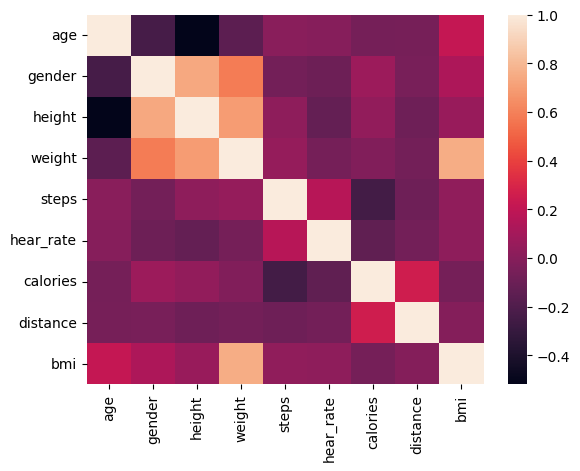

In [60]:
corr = data_core_features.corr()
sns.heatmap(corr)